In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def mape(actual, pred): 
    '''
    Mean Absolute Percentage Error (MAPE) Function
    
    input: list/series for actual values and predicted values
    output: mape value 
    '''
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [105]:
def mape(actual, pred): 

    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

## Prophet Only
(artinya prophet yang  menangani sendiri data yang non stasioner )

In [106]:
stasiun_4_intrp = pd.read_csv('C:\\Users\\thebl\\Downloads\\Clone\\Intern-BCC-2024\\Code\\EDA\\stasiun_4_intrp.csv')
stasiun_4_intrp.head()

,Unnamed: 0,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0


## Tavg Prediction

In [107]:
df_copy = stasiun_4_intrp.copy()

In [108]:
from prophet import Prophet


In [109]:
def train_prophet_model(df, target_column='y', date_column='ds', train_year_cutoff=2020):
    """
    Train a Prophet model using the provided DataFrame and column names.

    Parameters:
        df (DataFrame): Input DataFrame containing time series data.
        target_column (str): Name of the target column containing the time series values.
        date_column (str): Name of the date column containing the timestamps.
        train_year_cutoff (int): Cutoff year for training data.

    Returns:
        Prophet: Trained Prophet model.
    """
    # Rename columns if necessary
    df = df.rename(columns={date_column: 'ds', target_column: 'y'})

    # Convert date column to datetime
    df['ds'] = pd.to_datetime(df['ds'])

    # Separate training and testing data
    train_data = df[df['ds'].dt.year < train_year_cutoff]
    test_data = df[df['ds'].dt.year == train_year_cutoff]

    # Initialize and train the Prophet model
    model = Prophet()
    model.fit(train_data)

    return model

In [110]:
model_tavg = train_prophet_model(df_copy, target_column='Tavg', date_column='Unnamed: 0')

08:26:58 - cmdstanpy - INFO - Chain [1] start processing
08:26:58 - cmdstanpy - INFO - Chain [1] done processing


In [111]:
future = model_tavg.make_future_dataframe(periods=365, freq='D')
forecast = model_tavg.predict(future)

In [112]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1821,2020-12-26,28.639821,27.527651,29.728170
1822,2020-12-27,28.596598,27.433758,29.728702
1823,2020-12-28,28.525225,27.377214,29.667299
1824,2020-12-29,28.509066,27.319843,29.618586
1825,2020-12-30,28.535688,27.392418,29.605519


In [113]:
test_data_tavg = df_tavg[df_tavg['ds'].dt.year == 2020]

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
predicted_df = forecast.merge(test_data_tavg.rename(columns={'y': 'ytrue'}), on='ds')
predicted_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,ytrue
0,2020-01-01,28.372737,27.169373,29.257968,28.372737,28.372737,-0.111931,-0.111931,-0.111931,-0.042908,-0.042908,-0.042908,-0.069022,-0.069022,-0.069022,0.0,0.0,0.0,28.260806,24.6
1,2020-01-02,28.373448,27.196147,29.374531,28.373448,28.373448,-0.080345,-0.080345,-0.080345,0.009694,0.009694,0.009694,-0.090039,-0.090039,-0.090039,0.0,0.0,0.0,28.293103,26.6
2,2020-01-03,28.374159,27.257307,29.324824,28.374159,28.374159,-0.063353,-0.063353,-0.063353,0.055140,0.055140,0.055140,-0.118493,-0.118493,-0.118493,0.0,0.0,0.0,28.310806,27.7
3,2020-01-04,28.374871,27.154593,29.425640,28.374871,28.374871,-0.072387,-0.072387,-0.072387,0.081932,0.081932,0.081932,-0.154319,-0.154319,-0.154319,0.0,0.0,0.0,28.302484,27.4
4,2020-01-05,28.375582,27.157679,29.292873,28.375582,28.375582,-0.172452,-0.172452,-0.172452,0.024842,0.024842,0.024842,-0.197293,-0.197293,-0.197293,0.0,0.0,0.0,28.203130,27.3


In [ ]:
test_data_tavg = df_tavg[df_tavg['ds'].dt.year == 2020]

In [ ]:
predicted_df = forecast.merge(test_data_tavg.rename(columns={'y': 'ytrue'}), on='ds')
predicted_df


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,ytrue
0,2020-01-01,28.372737,27.169373,29.257968,28.372737,28.372737,-0.111931,-0.111931,-0.111931,-0.042908,-0.042908,-0.042908,-0.069022,-0.069022,-0.069022,0.0,0.0,0.0,28.260806,24.6
1,2020-01-02,28.373448,27.196147,29.374531,28.373448,28.373448,-0.080345,-0.080345,-0.080345,0.009694,0.009694,0.009694,-0.090039,-0.090039,-0.090039,0.0,0.0,0.0,28.293103,26.6
2,2020-01-03,28.374159,27.257307,29.324824,28.374159,28.374159,-0.063353,-0.063353,-0.063353,0.055140,0.055140,0.055140,-0.118493,-0.118493,-0.118493,0.0,0.0,0.0,28.310806,27.7
3,2020-01-04,28.374871,27.154593,29.425640,28.374871,28.374871,-0.072387,-0.072387,-0.072387,0.081932,0.081932,0.081932,-0.154319,-0.154319,-0.154319,0.0,0.0,0.0,28.302484,27.4
4,2020-01-05,28.375582,27.157679,29.292873,28.375582,28.375582,-0.172452,-0.172452,-0.172452,0.024842,0.024842,0.024842,-0.197293,-0.197293,-0.197293,0.0,0.0,0.0,28.203130,27.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2020-12-26,28.628810,27.527561,29.786066,28.223387,29.026770,0.011011,0.011011,0.011011,0.081932,0.081932,0.081932,-0.070921,-0.070921,-0.070921,0.0,0.0,0.0,28.639821,28.2
361,2020-12-27,28.629521,27.473066,29.663568,28.222746,29.030239,-0.032923,-0.032923,-0.032923,0.024842,0.024842,0.024842,-0.057765,-0.057765,-0.057765,0.0,0.0,0.0,28.596598,29.0
362,2020-12-28,28.630233,27.342328,29.643782,28.221162,29.032831,-0.105008,-0.105008,-0.105008,-0.055037,-0.055037,-0.055037,-0.049970,-0.049970,-0.049970,0.0,0.0,0.0,28.525225,28.1
363,2020-12-29,28.630944,27.395228,29.640854,28.219583,29.036221,-0.121878,-0.121878,-0.121878,-0.073662,-0.073662,-0.073662,-0.048216,-0.048216,-0.048216,0.0,0.0,0.0,28.509066,27.1


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


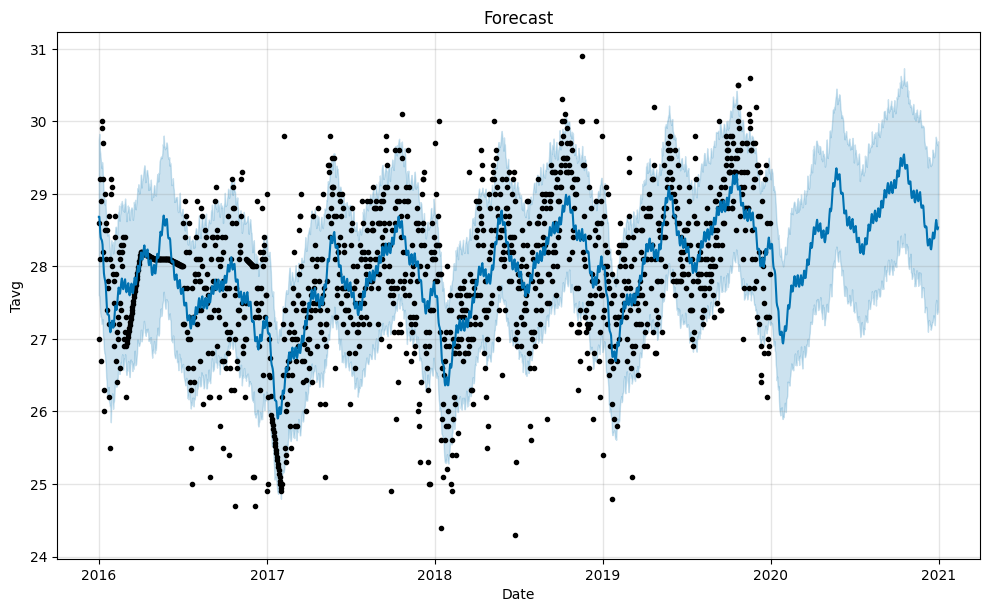

In [ ]:
fig = model_tavg.plot(forecast)
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('Tavg')
plt.grid(True)
plt.show()

In [ ]:
mape_value = mape(predicted_df['ytrue'], predicted_df['yhat'])
print("MAPE untuk tahun 2020:", mape_value)

MAPE untuk tahun 2020: 3.116411545701941


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

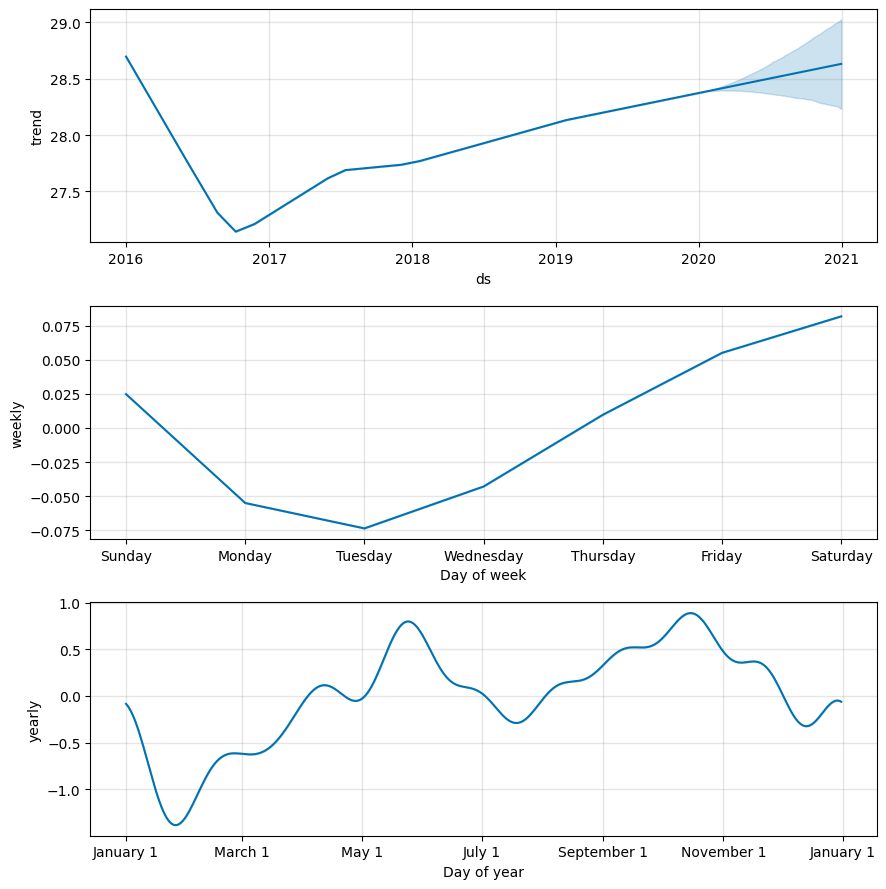

In [ ]:
fig = model.plot_components(forecast)

## Predict RH_avg

In [ ]:
model_RH_avg = train_prophet_model(df_copy, target_column='RH_avg', date_column='Unnamed: 0')

08:20:15 - cmdstanpy - INFO - Chain [1] start processing
08:20:16 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = model_RH_avg.make_future_dataframe(periods=365, freq='D')
forecast = model_RH_avg.predict(future)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


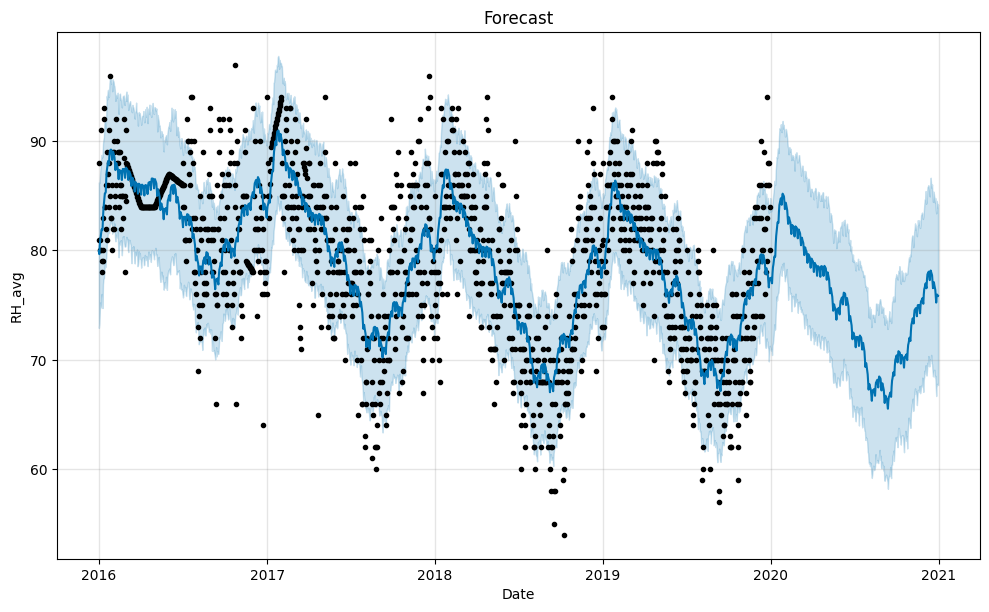

In [ ]:
fig = model_RH_avg.plot(forecast)
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('RH_avg')
plt.grid(True)
plt.show()

In [ ]:
mape_value = mape(predicted_df['ytrue'], predicted_df['yhat'])
print("MAPE untuk tahun 2020:", mape_value)

MAPE untuk tahun 2020: 6.948782468449739


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

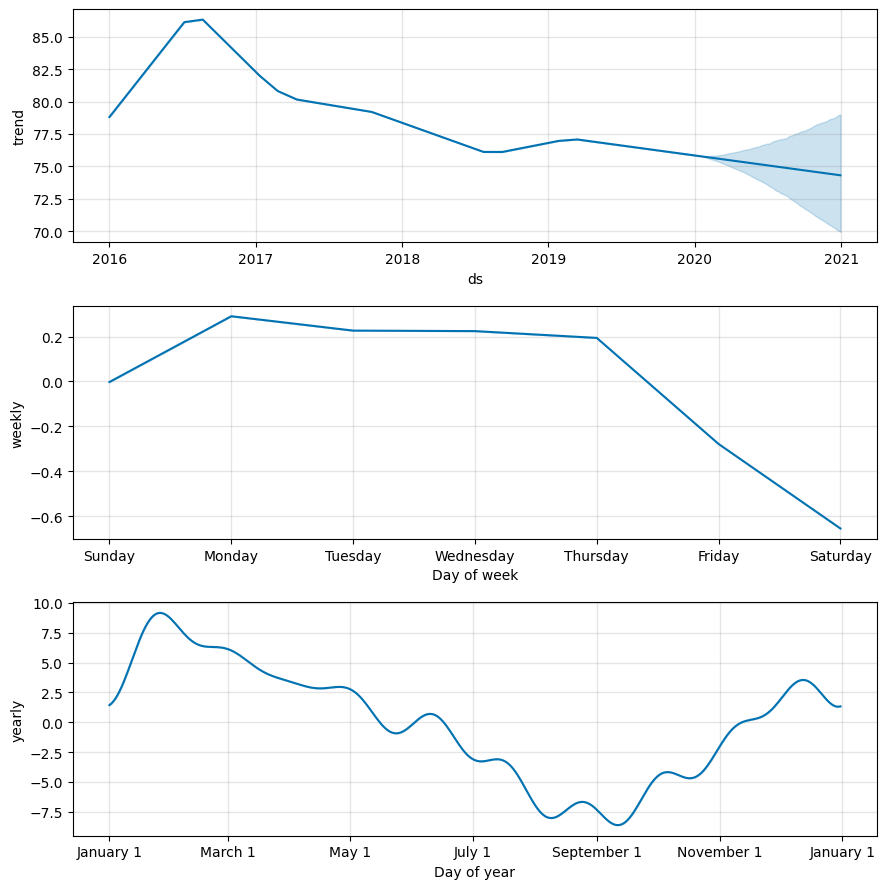

In [ ]:
fig = model.plot_components(forecast)

## ff_avg

In [114]:
model_ff_avg = train_prophet_model(df_copy, target_column='ff_avg', date_column='Unnamed: 0')

08:27:30 - cmdstanpy - INFO - Chain [1] start processing
08:27:31 - cmdstanpy - INFO - Chain [1] done processing


In [122]:
future = model_ff_avg.make_future_dataframe(periods=365, freq='D')
forecast = model_ff_avg.predict(future)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


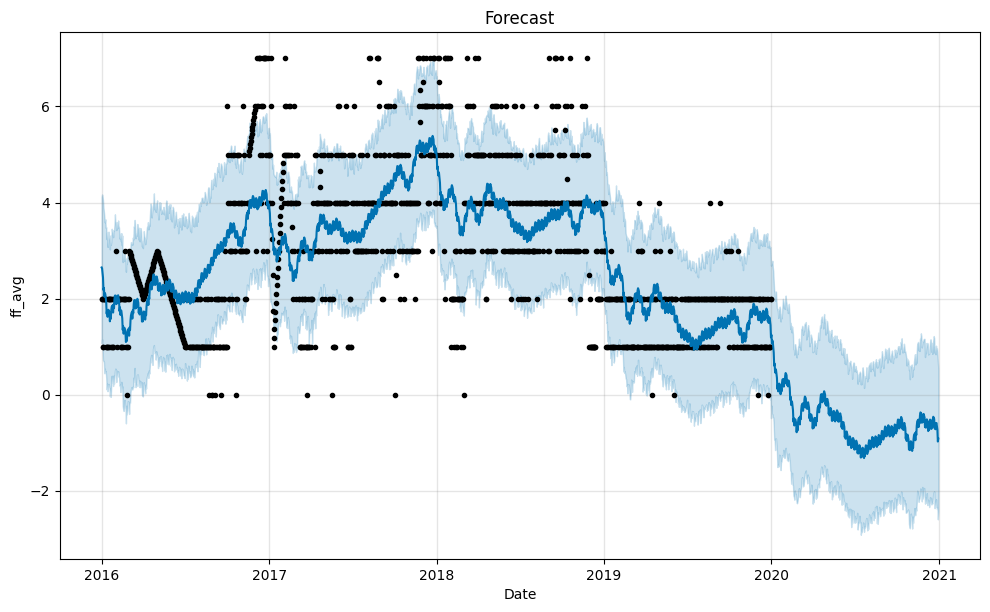

In [123]:
fig = model_ff_avg.plot(forecast)
plt.title('Forecast')
plt.xlabel('Date')
plt.ylabel('ff_avg')
plt.grid(True)
plt.show()

In [ ]:
mape_value = mape(predicted_df['ytrue'], predicted_df['yhat'])
print("MAPE untuk tahun 2020:", mape_value)

MAPE untuk tahun 2020: inf


C:\Users\thebl\AppData\Local\Temp\ipykernel_29052\479661077.py:4: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


In [120]:
model_RR = train_prophet_model(df_copy, target_column='RR', date_column='Unnamed: 0')

08:30:42 - cmdstanpy - INFO - Chain [1] start processing
08:30:42 - cmdstanpy - INFO - Chain [1] done processing
